In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, GRU, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [2]:
# R2 Score
CNN = []
LSTM = []
CNN_LSTM = []

In [3]:
CNN = [-0.3379785456033535, 0.47847370968320957, -8.74839100111415, -23.19827335077569, -0.004038771005055342, -1.5424992783527518, -1.6657244554969997]
LSTM = [0.7736750767848789, 0.8914803571816848, 0.9192161650601736, 0.9592819222242985, 0.9195513362439783, 0.8795452378270294, 0.9560485777451055]
CNN_LSTM = [0.8452926599948088, 0.8439802147383806, 0.9494181098001323, 0.9577573727775728, 0.86740205222032, 0.7393962071587878, 0.9496290980995592]

In [4]:
print(CNN_LSTM)

[0.8452926599948088, 0.8439802147383806, 0.9494181098001323, 0.9577573727775728, 0.86740205222032, 0.7393962071587878, 0.9496290980995592]


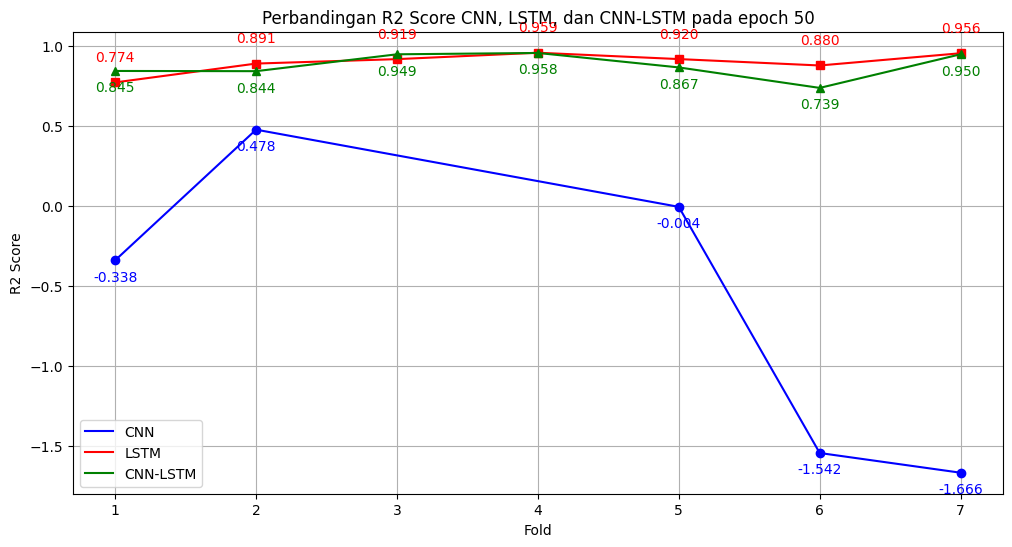

In [5]:
# Folds
folds = np.arange(1, len(CNN) + 1)

# Plotting
plt.figure(figsize=(12, 6))

# Plot CNN
cnn_folds, cnn_scores = [], []
for i in range(len(CNN)):
    if CNN[i] >= -2:
        plt.plot(folds[i], CNN[i], 'bo')
        plt.annotate(f'{CNN[i]:.3f}', (folds[i], CNN[i]), textcoords="offset points", xytext=(0,-15), ha='center', color='blue')
        cnn_folds.append(folds[i])
        cnn_scores.append(CNN[i])

plt.plot(cnn_folds, cnn_scores, 'b-', label='CNN')

# Plot LSTM
lstm_folds, lstm_scores = [], []
for i in range(len(LSTM)):
    if LSTM[i] >= 0:
        plt.plot(folds[i], LSTM[i], 'rs')
        plt.annotate(f'{LSTM[i]:.3f}', (folds[i], LSTM[i]), textcoords="offset points", xytext=(0,15), ha='center', color='red')
        lstm_folds.append(folds[i])
        lstm_scores.append(LSTM[i])

plt.plot(lstm_folds, lstm_scores, 'r-', label='LSTM')

# Plot CNN-LSTM
cnn_lstm_folds, cnn_lstm_scores = [], []
for i in range(len(CNN_LSTM)):
    if CNN_LSTM[i] >= -0.5:
        plt.plot(folds[i], CNN_LSTM[i], 'g^')
        plt.annotate(f'{CNN_LSTM[i]:.3f}', (folds[i], CNN_LSTM[i]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')
        cnn_lstm_folds.append(folds[i])
        cnn_lstm_scores.append(CNN_LSTM[i])

plt.plot(cnn_lstm_folds, cnn_lstm_scores, 'g-', label='CNN-LSTM')

plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.title('Perbandingan R2 Score CNN, LSTM, dan CNN-LSTM pada epoch 50')
plt.yscale('linear')  # Use linear scale for R2 score
plt.legend()
plt.grid(True)

# Show the plot
plt.show()